<a href="https://colab.research.google.com/github/Yumian-Cui/model-prediction/blob/main/DataChallenge_code_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Death prediction

[Dataset file: download to drive folder](https://drive.google.com/file/d/1XwYXWSKl57Tl_zQOE5plMRYce_tx1KDJ/view?usp=sharing)

# Prep / Initialization

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "19Zq2CdahvWALmCKspE8AYnwNZ3mikBda"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('df') 

In [ ]:
import pandas as pd

health_df = pd.read_csv('df')
health_df.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,179,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
1,14,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11,1
2,195,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
3,118,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
4,229,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207,0


# Part I: Data exploration

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                270 non-null    int64  
 1   age                       270 non-null    float64
 2   anaemia                   270 non-null    int64  
 3   creatinine_phosphokinase  270 non-null    int64  
 4   diabetes                  270 non-null    int64  
 5   ejection_fraction         270 non-null    int64  
 6   high_blood_pressure       270 non-null    int64  
 7   platelets                 270 non-null    float64
 8   serum_creatinine          270 non-null    float64
 9   serum_sodium              270 non-null    int64  
 10  sex                       270 non-null    int64  
 11  smoking                   270 non-null    int64  
 12  time                      270 non-null    int64  
 13  DEATH_EVENT               270 non-null    int64  
dtypes: float64

In [ ]:
#check the unique values for each variable, from here we can preliminarily tell variables from discrete to continuous
health_df.nunique()

Unnamed: 0                  270
age                          46
anaemia                       2
creatinine_phosphokinase    193
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   169
serum_creatinine             39
serum_sodium                 27
sex                           2
smoking                       2
time                        139
DEATH_EVENT                   2
dtype: int64

In [ ]:
# see if there's any missing values, no missing value -> then proceed
health_df.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#Drop the unrelated variable
#Unnamed column: Patient ID, irrelevant, so can take it out for our analysis
health_df.drop([health_df.columns[0]], axis = 1, inplace=True)
health_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
1,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11,1
2,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
3,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
4,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207,0


In [ ]:
# understand numerical feature
health_df[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,60.639507,597.674074,38.240741,264016.054407,1.406889,136.670370,129.388889
std,11.754936,1007.037547,12.015379,97577.471257,1.074922,4.488591,77.380635
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,51.000000,115.750000,30.000000,213500.000000,0.900000,134.000000,72.250000
50%,60.000000,251.500000,38.000000,263179.015000,1.100000,137.000000,114.000000
75%,69.750000,582.000000,45.000000,303750.000000,1.400000,140.000000,200.750000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,280.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

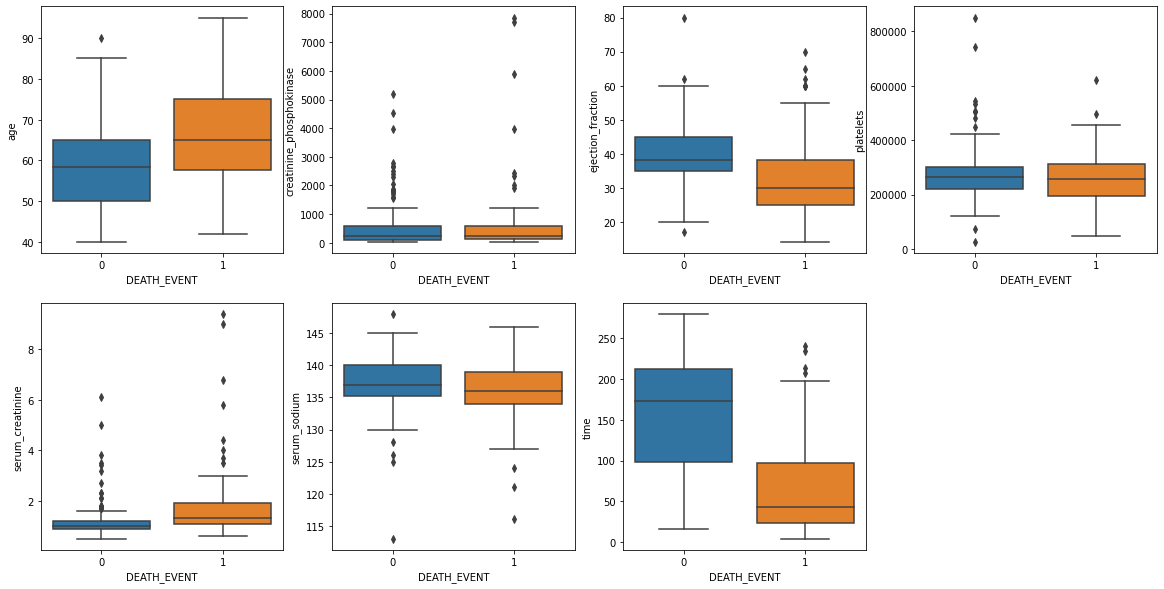

In [ ]:
# boxplot for numerical feature
# "age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"
_,axss = plt.subplots(2,4, figsize=[20,10])
sns.boxplot(x='DEATH_EVENT', y ='age', data=health_df, ax=axss[0][0])
sns.boxplot(x='DEATH_EVENT', y ='creatinine_phosphokinase', data=health_df, ax=axss[0][1])
sns.boxplot(x='DEATH_EVENT', y ='ejection_fraction', data=health_df, ax=axss[0][2])
sns.boxplot(x='DEATH_EVENT', y ='platelets', data=health_df, ax=axss[0][3])
sns.boxplot(x='DEATH_EVENT', y ='serum_creatinine', data=health_df, ax=axss[1][0])
sns.boxplot(x='DEATH_EVENT', y ='serum_sodium', data=health_df, ax=axss[1][1])
sns.boxplot(x='DEATH_EVENT', y ='time', data=health_df, ax=axss[1][2])

_.delaxes(axss[1,3])

In [ ]:
#get rid of the outliers
var_list = [health_df.age, health_df.creatinine_phosphokinase, health_df.ejection_fraction,health_df.platelets, health_df.serum_creatinine, health_df.serum_sodium,health_df.time]
for var in var_list:
  var_75 = var.describe()['75%']
  var_25 = var.describe()['25%']
  var_min = var.describe()['min']
  var_max = var.describe()['max']
  diff = var_75 - var_25
  new_max = var_75 + 1.5 * diff
  new_min = var_25 - 1.5 * diff
  if new_max < var_max:
    health_df = health_df[var <= new_max] 
  if new_min > var_min:
    health_df = health_df[var >= new_min]
  #print(var.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


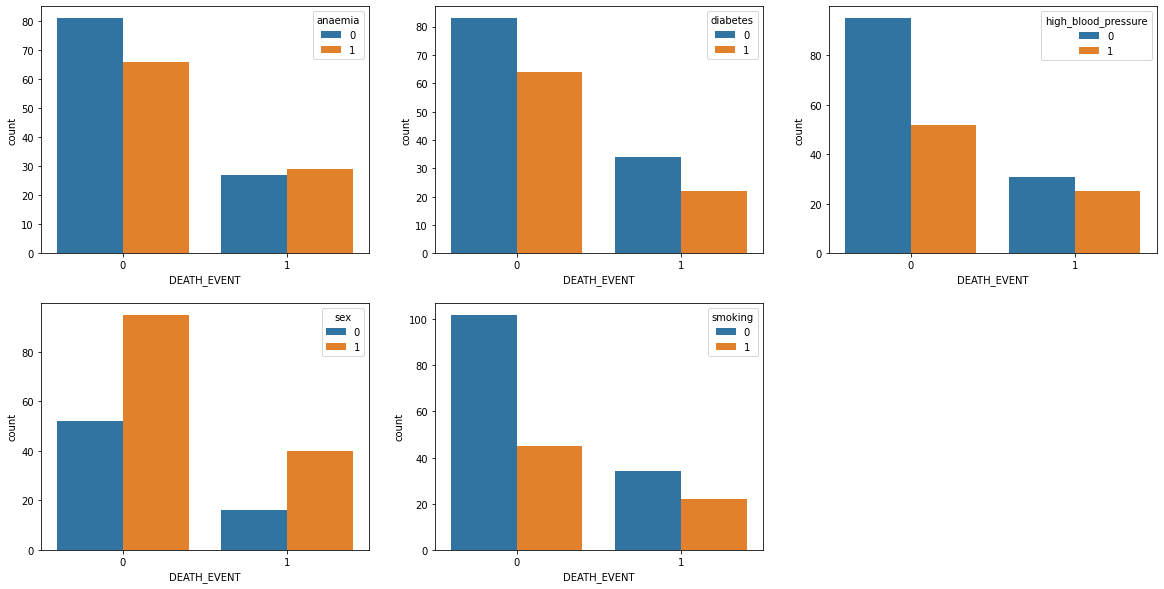

In [ ]:
#understand categorical feature
# ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.countplot(x='DEATH_EVENT', hue ="anaemia", data=health_df, ax=axss[0][0])
sns.countplot(x='DEATH_EVENT', hue ="diabetes", data=health_df, ax=axss[0][1])
sns.countplot(x='DEATH_EVENT', hue ="high_blood_pressure", data=health_df, ax=axss[0][2])
sns.countplot(x='DEATH_EVENT', hue ="sex", data=health_df, ax=axss[1][0])
sns.countplot(x='DEATH_EVENT', hue ="smoking", data=health_df, ax=axss[1][1]) #0->smoker,1->non-smoker

_.delaxes(axss[1,2])

In [ ]:
# Get target variable
# save target variable to y
y = health_df['DEATH_EVENT']
print(y.shape)
# check the propotion where y = 1,so the percentage of death rate due to heart failure = 32.59%
print(y.sum() / y.shape[0] * 100)

(203,)
27.586206896551722


In [ ]:
# drop unnecessary columns + target variable column
X = health_df.drop(["DEATH_EVENT"],axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147
1,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11
2,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180
5,73.0,1,1185,0,40,1,220000.0,0.9,141,0,0,213
7,50.0,0,115,0,45,1,184000.0,0.9,134,1,1,118


# Part II: Data Modeling

In [ ]:
# Split data into training and testing
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 152 observation with 12 features
test data has 51 observation with 12 features


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.80645161 0.83870968 0.86666667 0.83333333 0.83333333]
Model accuracy of Logistic Regression is 0.8356989247311828
[0.70967742 0.70967742 0.83333333 0.73333333 0.76666667]
Model accuracy of KNN is 0.7505376344086022
[0.87096774 0.93548387 0.93333333 0.8        0.83333333]
Model accuracy of Random Forest is 0.8746236559139785


# Part III: Hyperparameter Tune

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

## Part III.1: Random Forest

In [ ]:
parameters = {
    'n_estimators' : [35,40,45,50,55,59,60,61,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8748387096774193
Best parameters set:
n_estimators:55


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_
print (best_RF_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Part III.2: Logistic Regression

In [ ]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01,0.03,0.05,0.06,0.07,1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5) 
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.03, 0.05, 0.06, 0.07, 1, 5, 10),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8619354838709677
Best parameters set:
C:1
penalty:l1


In [ ]:
best_LR_model = Grid_LR.best_estimator_
print (best_LR_model)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


# Part IV: Model Evaluation 


*   Accuracy
*   Precision
*   Recall
*   ROC/AUC 



## Part IV.1: Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm): # cm = confusion matrix
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Death']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))), 
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8823529411764706
precision is: 0.7857142857142857
recall is: 0.7857142857142857

Logistic Regression
Accuracy is: 0.8627450980392157
precision is: 0.7692307692307693
recall is: 0.7142857142857143



## Part IV.1: ROC/AUC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

### RF: ROC AUC

In [ ]:
# RF
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1] # this is to get y_pred churning probablity 
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

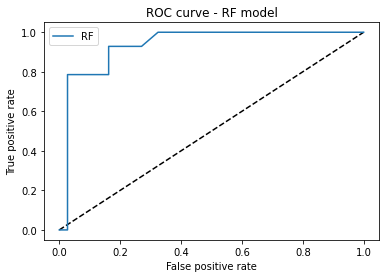

In [ ]:
# ROC curve of Random Forest result
plt.figure(1) # number identifier
plt.plot([0, 1], [0, 1], 'k--') # k -> black color, -- line style
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best') # legend location, 'best' default
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9343629343629344

### LR: ROC AUC

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

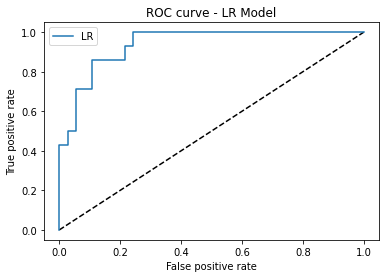

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9382239382239383

# Part V: Feature Selection

In [ ]:
import numpy as np

## Based on RF

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier(n_estimators=80)
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# array([ 2,  8,  0,  4,  5,  3,  7, 10,  1,  6,  9, 11])

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
time : 0.4081
ejection_fraction : 0.1365
age : 0.1191
serum_creatinine : 0.1034
platelets : 0.073
creatinine_phosphokinase : 0.0585
serum_sodium : 0.0431
smoking : 0.0145
high_blood_pressure : 0.0128
diabetes : 0.0116
anaemia : 0.0113
sex : 0.0082


## Based on LR

In [ ]:
#see the proportions of DEATH_EVENT = 0 and =1 in the dataset
prop = health_df.DEATH_EVENT.value_counts(1)
print("The percentage of DEATH_EVENT=1 in the dataset is " + str(prop[1]*100))
print("The percentage of DEATH_EVENT=0 in the dataset is " + str(prop[0]*100))
print("Since the proportion of DEATH_EVENT=1 is larger than 5%, we can use Logistic Regression model to predict DEATH_EVENT.")

The percentage of DEATH_EVENT=1 in the dataset is 27.586206896551722
The percentage of DEATH_EVENT=0 in the dataset is 72.41379310344827
Since the proportion of DEATH_EVENT=1 is larger than 5%, we can use Logistic Regression model to predict DEATH_EVENT.


In [ ]:
summary = health_df.groupby("DEATH_EVENT")
group = summary.mean()
group

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.426306,0.448980,333.659864,0.435374,40.564626,0.353741,258520.954422,1.059252,137.251701,0.646259,0.306122,158.129252
1,66.607143,0.517857,364.053571,0.392857,32.142857,0.446429,247866.182321,1.315714,136.482143,0.714286,0.392857,63.857143


In [ ]:
group.iloc[1] > group.iloc[0]

age                          True
anaemia                      True
creatinine_phosphokinase     True
diabetes                    False
ejection_fraction           False
high_blood_pressure          True
platelets                   False
serum_creatinine             True
serum_sodium                False
sex                          True
smoking                      True
time                        False
dtype: bool

From the grouping, we can see that age, anaemia, creatinine_phosphokinase, diabetes, high_blood_pressure, serum_creatinine, sex, and smoking have higher mean values when DEATH_EVENT = 1, meaning that they may more correlated with death due to heart failure.

In [ ]:
#Find the correlation between DEATH_EVENT and other variables and sort in descending order.
health_df.corr()[['DEATH_EVENT']].sort_values('DEATH_EVENT',ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.347465
age,0.309057
high_blood_pressure,0.085377
smoking,0.082440
sex,0.064419
anaemia,0.061696
creatinine_phosphokinase,0.048073
diabetes,-0.038457
platelets,-0.072951


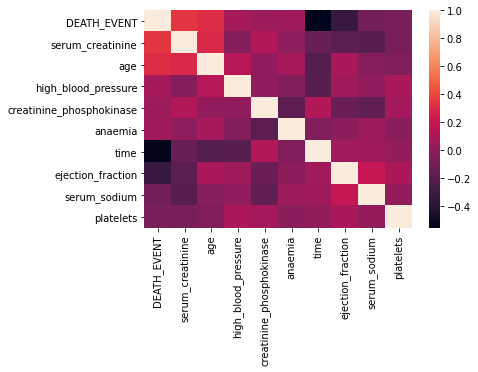

In [ ]:
q1 = ['DEATH_EVENT','serum_creatinine', 'age', 'high_blood_pressure', 'creatinine_phosphokinase', 'anaemia', 'time', 'ejection_fraction', 'serum_sodium', 'platelets']
sns.heatmap(health_df[q1].corr())

We can see that serum_creatinine, age, high_blood_pressure, creatinine_phosphokinase, and anaemia are more positively related to the death due to heart failure. Time, ejection_fraction, serum_sodium, platelets are more negatively related to the death.

In [ ]:
#Logsitic Regression
#Test1: Choose serum_creatinine and age as independent variables
y = health_df['DEATH_EVENT']
x = health_df[['serum_creatinine', 'age']]
#Test2: Add high_blood_pressure, creatinine_phosphokinase, anaemia as independent variables
x2 = health_df[['serum_creatinine', 'age', 'high_blood_pressure', 'creatinine_phosphokinase', 'anaemia']]
#test3
x3=x2
#test4: 
x4 = health_df[['time', 'ejection_fraction', 'serum_sodium']]
#test5
x5 = health_df[['serum_creatinine', 'age','time', 'ejection_fraction', 'serum_sodium']]
#test6:
x6 = health_df[['serum_creatinine', 'age','time', 'ejection_fraction', 'serum_sodium','high_blood_pressure']]

In [ ]:
from sklearn.model_selection import train_test_split
#test1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
#test2
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=100)

In [ ]:
#test3: split the testing and training sets into half-half
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.5,random_state=100)

In [ ]:
#test4
x_train,x_test,y_train,y_test=train_test_split(x4,y,test_size=0.3,random_state=100)

In [ ]:
#test5: 
x_train,x_test,y_train,y_test=train_test_split(x5,y,test_size=0.3,random_state=100)

In [ ]:
#test6:
x_train,x_test,y_train,y_test=train_test_split(x6,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
#fit the model
lr.fit(x_train,y_train)
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [ ]:
#test 1
import sklearn.metrics as metrics
"""cm = metrics.confusion_matrix(y_train,y_pred_train)
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
print (accuracy)"""
print (metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

[[94  7]
 [28 13]]
0.7535211267605634
0.8032786885245902


In [ ]:
#test2
metrics.confusion_matrix(y_train,y_pred_train)
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

0.7464788732394366
0.819672131147541


In [ ]:
#test3
metrics.confusion_matrix(y_train,y_pred_train)
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

0.7623762376237624
0.7745098039215687


In [ ]:
#test4
metrics.confusion_matrix(y_train,y_pred_train)
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

0.823943661971831
0.9016393442622951


In [ ]:
#test5
metrics.confusion_matrix(y_train,y_pred_train)
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

0.8309859154929577
0.9508196721311475


In [ ]:
#test6
metrics.confusion_matrix(y_train,y_pred_train)
print(metrics.accuracy_score(y_train,y_pred_train))

metrics.confusion_matrix(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test))

0.823943661971831
0.9508196721311475
